# 4. Simulation of Dirichlet process prior realizations
## Consider a $DP(\alpha, G_0)$ prior over the space of distributions (equivalently c.d.f's) $G$ on ${\rm I\!R}$, with $G_0 = N(0,1)$.

### (a) Use both Ferguson’s original definition and Sethuraman’s constructive definition to generate(multiple) prior c.d.f.  realizations from the $DP(\alpha,N(0,1))$, for different values ofαrangingfromsmalltolarge.

In [1]:
import numpy as np
from scipy.stats import norm, dirichlet, beta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def DirPriorSample(samples = 5, nn = 50, alpha = 5, mean = 0, sd = 1):
    # Interval bound
    bound = np.maximum(mean-4*sd, mean+4*sd)
    
    # Discretization of the space
    x = np.linspace(-bound, bound, nn+1)
    
    # Probability measure for each interval
    y =np.zeros(nn+1)
    y[0] = norm.cdf(x[0], mean, sd)
    for i in range(1,nn+1):
        y[i] = norm.cdf(x[i], mean, sd) - norm.cdf(x[i-1], mean, sd)
        
    y = np.append(y, 1 - norm.cdf(x[nn], mean, sd))
    
    # Creating the non-negative measures
    param = alpha * y
    
    # Samplind from the dirichlet distribution
    sdir = dirichlet.rvs(param, samples)
    
    # Generating the CDF
    draw = np.cumsum(sdir.T, axis = 0)
    return np.array([draw, bound])

In [3]:
test = DirPriorSample(samples = 5, nn = 50, alpha = 5, mean = 0, sd = 1)

Changing $\alpha$ changes the shapes of each realization of the prior distributions. As $\alpha$ grows, the distributions are more concentrated around the theoretical N(0,1) represented by the black line. This is due to the fact that $\alpha$ represents how confident we are that the prior distribution is true. For each simulation using the DP I am generating 10 CDF, each represented with a different color.

In [4]:
np.random.seed(1)
samples = 10
nn = 100

$\alpha = 0.1$

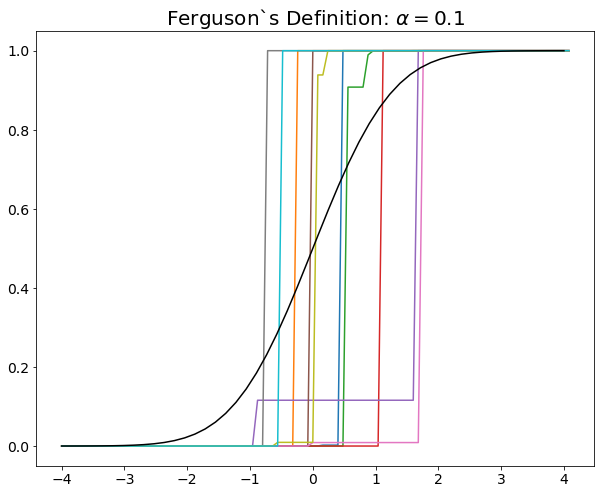

In [5]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 0.1, mean = 0, sd = 1)
results = draws[0]
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.plot(xx, results)
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Ferguson`s Definition: $\alpha =0.1$',fontsize=20)
plt.show()

$\alpha = 1$

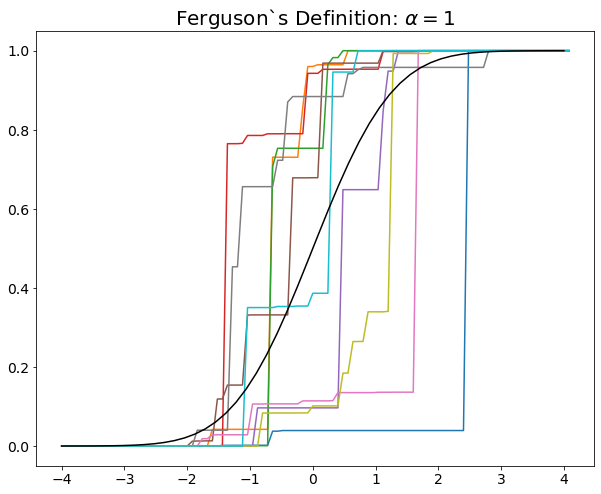

In [6]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 1, mean = 0, sd = 1)
results = draws[0]

plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.plot(xx, results)
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Ferguson`s Definition: $\alpha =1$',fontsize=20)
plt.show()

$\alpha = 10$

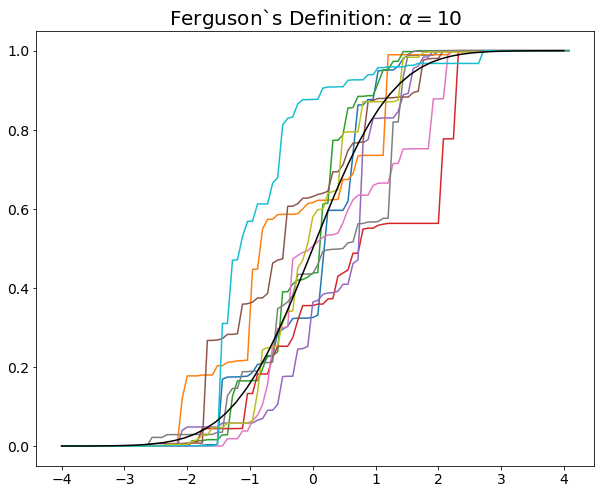

In [7]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 10, mean = 0, sd = 1)
results = draws[0]
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.plot(xx, results)
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Ferguson`s Definition: $\alpha =10$',fontsize=20)
plt.show()

$\alpha = 100$

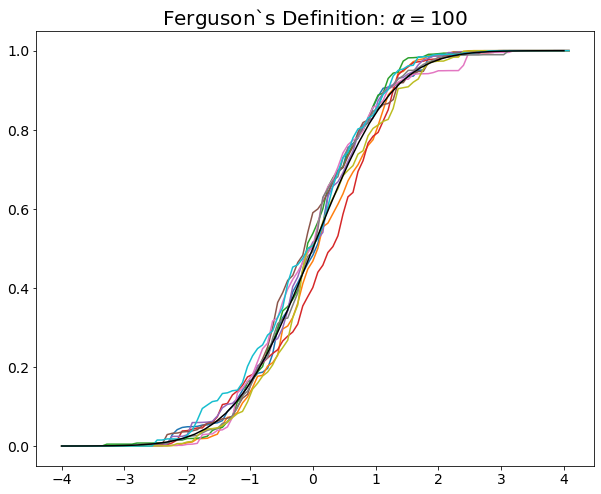

In [8]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 100, mean = 0, sd = 1)
results = draws[0]
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.plot(xx, results)
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Ferguson`s Definition: $\alpha =100$',fontsize=20)
plt.show()

Now,  we use Sethurman's constructive definition to generate prior CDF realizations. 

In [9]:
def DirProcessSamplesSethurmans(nn = 1000, alpha = 1):
    theta_vec = np.random.normal(0,1, nn)
    
    z = np.random.beta(1, alpha, nn)
    log_z = np.log(z)
    S_log = np.append(0.0, np.cumsum(np.log((1 - z)))[:nn-1])
    log_w = log_z + S_log
    w = np.exp(log_w)
    return np.array([theta_vec,w])

In [10]:
np.random.seed(1)

In [11]:
from random import randint
colors = []

for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

$\alpha=0.1$

Text(0.5, 1.0, 'Stick breaking: $\\alpha =0.1$')

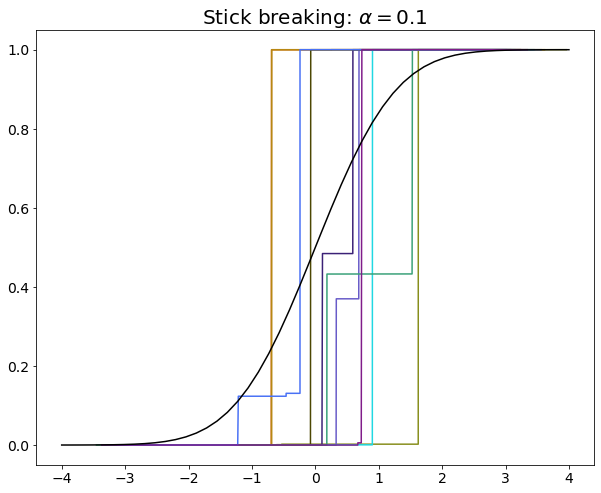

In [12]:
nn = 1000
samples = np.zeros((10, 2, nn))
for i in range(10):
    samples[i] = DirProcessSamplesSethurmans(nn = nn, alpha = 0.1)
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(10):
    results = samples[i]
    plt.plot(results[0][np.argsort(results[0])],
            np.cumsum(results[1][np.argsort(results[0])]), color = colors[i])

plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Stick breaking: $\alpha =0.1$',fontsize=20)

$\alpha = 1$

Text(0.5, 1.0, 'Stick breaking: $\\alpha =1$')

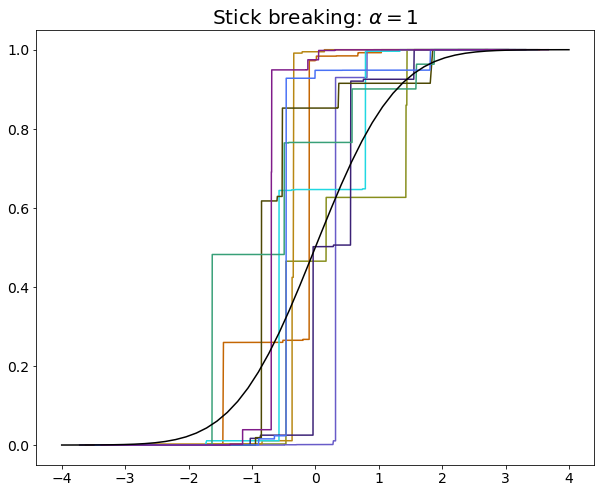

In [13]:
samples = np.zeros((10, 2, nn))
for i in range(10):
    samples[i] = DirProcessSamplesSethurmans(nn = nn, alpha = 1)
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(10):
    results = samples[i]
    plt.plot(results[0][np.argsort(results[0])],
            np.cumsum(results[1][np.argsort(results[0])]), color = colors[i])
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Stick breaking: $\alpha =1$',fontsize=20)

$\alpha = 10$

Text(0.5, 1.0, 'Stick breaking: $\\alpha =10$')

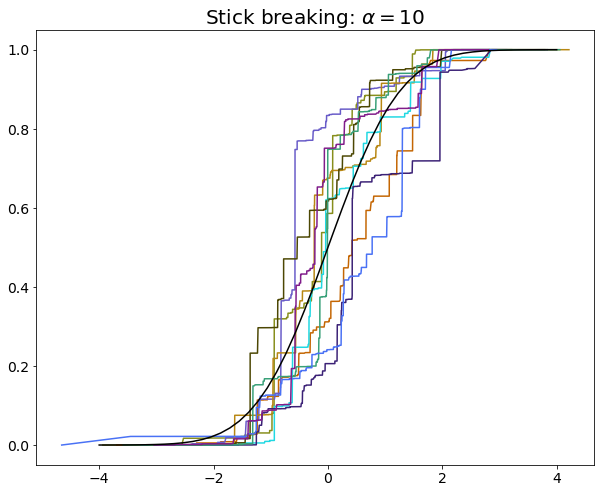

In [14]:
samples = np.zeros((10, 2, nn))
for i in range(10):
    samples[i] = DirProcessSamplesSethurmans(nn = nn, alpha = 10)
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(10):
    results = samples[i]
    plt.plot(results[0][np.argsort(results[0])],
            np.cumsum(results[1][np.argsort(results[0])]), color = colors[i])
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black")
plt.title(label = r'Stick breaking: $\alpha =10$',fontsize=20)

$\alpha = 100$

Text(0.5, 1.0, 'Stick breaking: $\\alpha =100$')

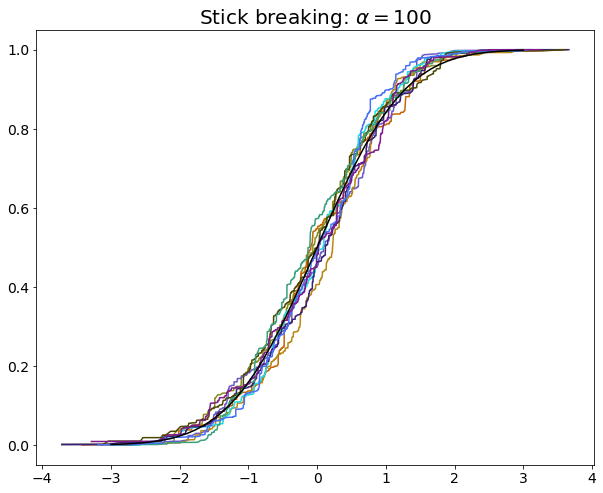

In [15]:
samples = np.zeros((10, 2, nn))
for i in range(10):
    samples[i] = DirProcessSamplesSethurmans(nn = nn, alpha = 100)
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(10):
    results = samples[i]
    plt.plot(results[0][np.argsort(results[0])],
            np.cumsum(results[1][np.argsort(results[0])]), color = colors[i])
plt.plot(np.linspace(-3,3), norm.cdf(np.linspace(-3,3)), color = "black")
plt.title(label = r'Stick breaking: $\alpha =100$',fontsize=20)

### (b) In addition to prior c.d.f. realizations, obtain, for each value of $\alpha$, the corresponding prior distribution for the mean functional $$\mu(G) = \int t dG(t) $$ and for the variance functional  $$\sigma^2(G) = \int t^2 dG(t) - \left\{\int t dG(t) \right\}^2$$

Using Ferguson's definition of the DP, I can compute the functional mean and the functional variance for each simulation, fixing the value of $\alpha$.

In [16]:
np.random.seed(1)
samples = 100
nn = 100

In [17]:
xx

array([-4.  , -3.92, -3.84, -3.76, -3.68, -3.6 , -3.52, -3.44, -3.36,
       -3.28, -3.2 , -3.12, -3.04, -2.96, -2.88, -2.8 , -2.72, -2.64,
       -2.56, -2.48, -2.4 , -2.32, -2.24, -2.16, -2.08, -2.  , -1.92,
       -1.84, -1.76, -1.68, -1.6 , -1.52, -1.44, -1.36, -1.28, -1.2 ,
       -1.12, -1.04, -0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48,
       -0.4 , -0.32, -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,
        0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96,
        1.04,  1.12,  1.2 ,  1.28,  1.36,  1.44,  1.52,  1.6 ,  1.68,
        1.76,  1.84,  1.92,  2.  ,  2.08,  2.16,  2.24,  2.32,  2.4 ,
        2.48,  2.56,  2.64,  2.72,  2.8 ,  2.88,  2.96,  3.04,  3.12,
        3.2 ,  3.28,  3.36,  3.44,  3.52,  3.6 ,  3.68,  3.76,  3.84,
        3.92,  4.  ,  4.08])

$\alpha = 0.1$

In [18]:
results[:,1]

array([2.18234088, 0.00435896])

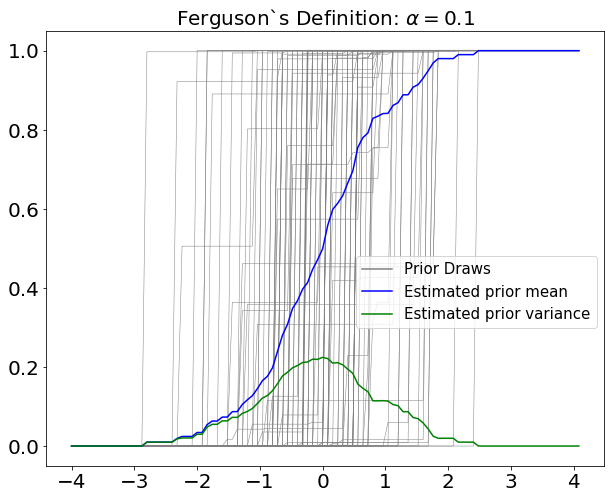

In [19]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 0.1, mean = 0, sd = 1)
results = draws[0]

xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(xx, results[:,1], color = "gray", label = "Prior Draws")
plt.plot(xx, results, color = "grey",linewidth=0.5)
mean_fn = np.mean(results, axis = 1)
plt.plot(xx, mean_fn, color = "blue", label = "Estimated prior mean")
var_fn = np.var(results, axis = 1)
plt.plot(xx, var_fn, color = "green", label = "Estimated prior variance")
plt.legend(loc=1, bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.title(label = r'Ferguson`s Definition: $\alpha =0.1$', fontsize = 20)
plt.show()

$\alpha = 1$

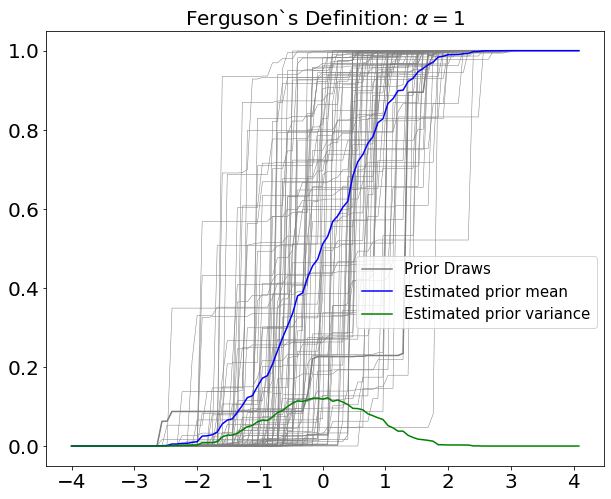

In [20]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 1, mean = 0, sd = 1)
results = draws[0]

xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(xx, results, color = "grey",linewidth=0.5)
plt.plot(xx, results[:,1], color = "gray", label = "Prior Draws")
mean_fn = np.mean(results, axis = 1)
plt.plot(xx, mean_fn, color = "blue", label = "Estimated prior mean")
var_fn = np.var(results, axis = 1)
plt.plot(xx, var_fn, color = "green", label = "Estimated prior variance")
plt.legend(loc=1, bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.title(label = r'Ferguson`s Definition: $\alpha =1$', fontsize = 20)
plt.show()

$\alpha = 10$

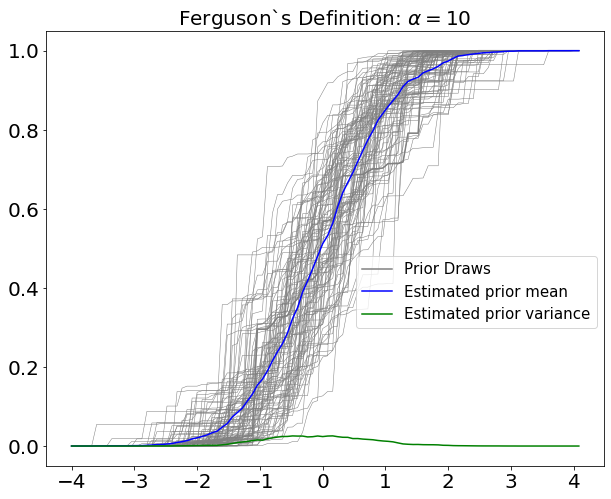

In [21]:
draws = DirPriorSample(samples = samples, nn = nn, alpha = 10, mean = 0, sd = 1)
results = draws[0]

xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(xx, results, color = "grey",linewidth=0.5)
plt.plot(xx, results[:,1], color = "gray", label = "Prior Draws")
mean_fn = np.mean(results, axis = 1)
plt.plot(xx, mean_fn, color = "blue", label = "Estimated prior mean")
var_fn = np.var(results, axis = 1)
plt.plot(xx, var_fn, color = "green", label = "Estimated prior variance")
plt.legend(loc=1, bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.title(label = r'Ferguson`s Definition: $\alpha =10$', fontsize = 20)
plt.show()

The variance decreases as $\alpha$ increases. In each case it grows around the central values and it goes to zero as the distribution reaches values 0 or 1. The functional mean becomes more similar to the c.d.f. as $\alpha$ gets larger.

### (c) Consider also a simulation under a mixture of DPs (MDP) prior, which extends the DP above by adding a prior for $\alpha$. Therefore, the MDP prior for G is defined such that, $G|\alpha \sim DP(\alpha, N(0,1)$, with a prior assigned to the precision parameter $\alpha$ from its prior. You can work with a gamma prior for $\alpha$ and 2-3 different choices for the gamma prior parameters.

Next, we extend the Dirichlet process by adding a gamma prior for M. 

$\alpha \sim Gamma(3,3)$

In [22]:
np.random.seed(1)
samples = 100
nn = 100
a0 = 3
b0 = 3

In [23]:
alpha_prior = np.random.gamma(a0,b0, size = 1)
prior_vec = alpha_prior
draws = DirPriorSample(samples = 1, nn = nn, alpha = alpha_prior, mean = 0, sd = 1)

Text(0.5, 1.0, '$\\alpha \\sim Gamma(3,3)$')

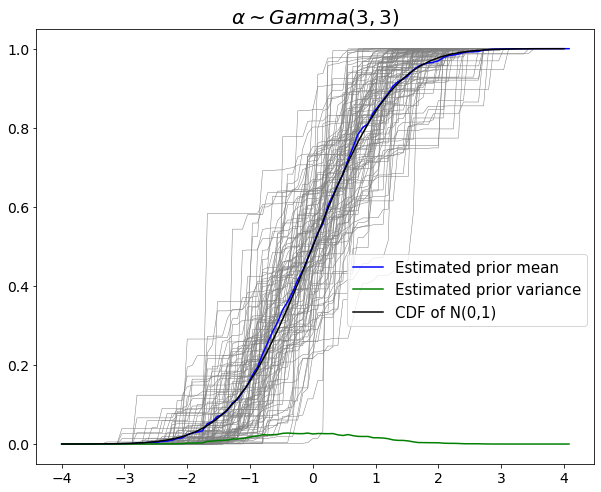

In [24]:
results = draws[0]
results_save = np.zeros((results.shape[0],samples))

for i in range(samples):
    alpha_prior = np.random.gamma(a0,b0, size = 1)
    prior_vec = np.append(prior_vec, alpha_prior)
    draws = DirPriorSample(samples = 1, nn = nn, alpha = alpha_prior, mean = 0, sd = 1)
    new_results = draws[0]
    results_save[:,i] = new_results.flatten()
    
xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xx, results_save, color = "grey",linewidth=0.5)
mean_fn = np.mean(results_save, axis = 1)
plt.plot(xx, mean_fn, color = "blue", label = "Estimated prior mean")
var_fn = np.var(results_save, axis = 1)
plt.plot(xx, var_fn, color = "green", label = "Estimated prior variance")
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black", label = "CDF of N(0,1)")
plt.legend(loc=1, bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.title(label = r'$\alpha \sim Gamma(3,3)$', fontsize = 20)

Text(0.5, 1.0, 'Prior for $\\alpha$')

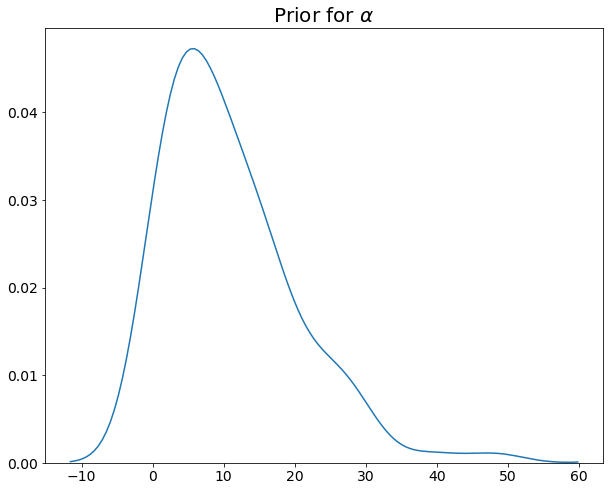

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.distplot(prior_vec, hist=False, rug=False)
plt.title(label=r'Prior for $\alpha$', fontsize = 20)

$\alpha \sim Gamma(1,10)$

In [26]:
np.random.seed(1)
samples = 100
nn = 100
a0 = 1
b0 = 10

Text(0.5, 1.0, '$\\alpha \\sim Gamma(1,10)$')

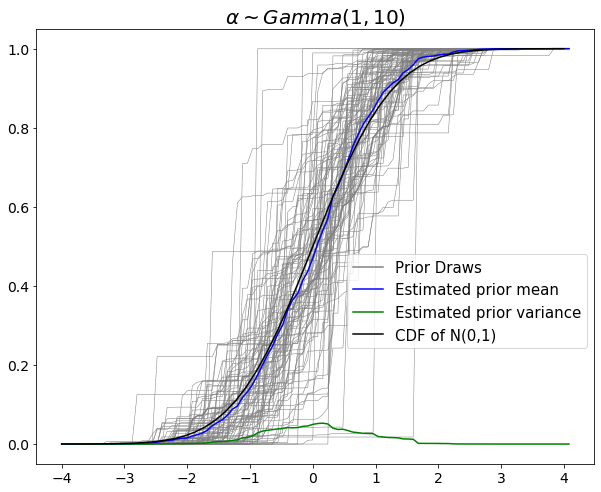

In [31]:
alpha_prior = np.random.gamma(a0,b0, size = 1)
prior_vec = alpha_prior
draws = DirPriorSample(samples = 1, nn = nn, alpha = alpha_prior, mean = 0, sd = 1)

results = draws[0]
results_save = np.zeros((results.shape[0],samples))

for i in range(samples):
    alpha_prior = np.random.gamma(a0,b0, size = 1)
    prior_vec = np.append(prior_vec, alpha_prior)
    draws = DirPriorSample(samples = 1, nn = nn, alpha = alpha_prior, mean = 0, sd = 1)
    new_results = draws[0]
    results_save[:,i] = new_results.flatten()

xx = np.append(np.linspace(-draws[1], draws[1], nn+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/nn )
# Plot the results
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xx, results_save[:,1], color = "gray", label = "Prior Draws")
plt.plot(xx, results_save, color = "grey",linewidth=0.5)
mean_fn = np.mean(results_save, axis = 1)
plt.plot(xx, mean_fn, color = "blue", label = "Estimated prior mean")
var_fn = np.var(results_save, axis = 1)
plt.plot(xx, var_fn, color = "green", label = "Estimated prior variance")
plt.plot(np.linspace(-4,4), norm.cdf(np.linspace(-4,4)), color = "black", label = "CDF of N(0,1)")
plt.legend(loc=1, bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.title(label = r'$\alpha \sim Gamma(1,10)$', fontsize = 20)

Text(0.5, 1.0, 'Prior for $\\alpha$')

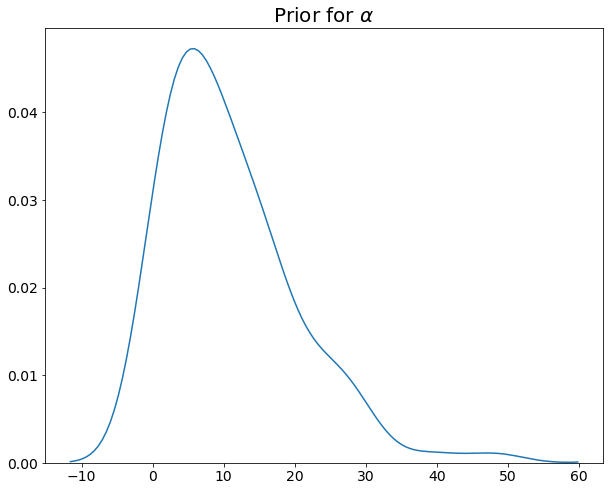

In [28]:
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.distplot(prior_vec, hist=False, rug=False)
plt.title(label=r'Prior for $\alpha$', fontsize = 20)